In [ ]:
# This Notebook loads a dataset from memory, calculates NDBI on the result set, and plots the results. 
# NDBI = (SWIR – NIR)/(SWIR + NIR)

In [15]:
import datacube
from datacube.storage import masking

dc = datacube.Datacube()

In [31]:
# Declare some 'constants' for the program
p = 'LC08_scene'
res = (0.0025, -0.0025)
m = ['swir2', 'nir', 'quality'] 

In [32]:
# Load the data into memory
data = dc.load(product = p
                    , measurements = m
                    #, time= (start, end)
                    , resolution = res
                   )

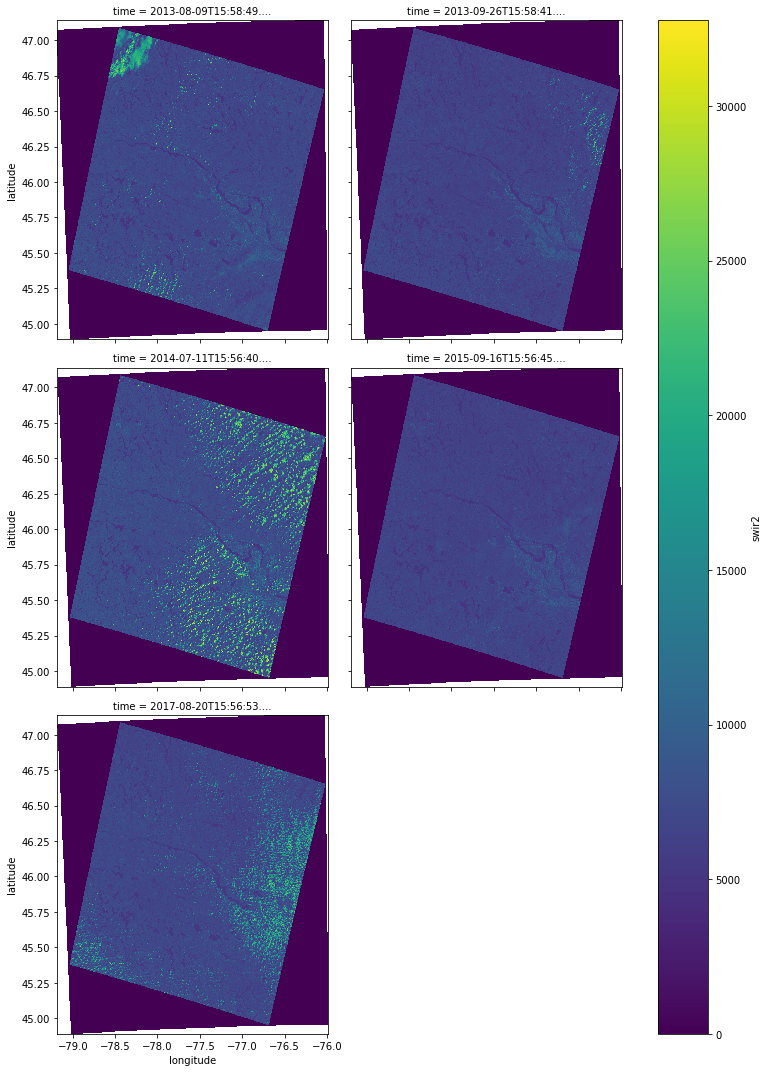

In [33]:
# Isolate all valid data in the the two bands of interest
swir2 = data.swir2.where(data.swir2 != data.swir2.attrs['nodata'])
nir = data.nir.where(data.nir != data.nir.attrs['nodata'])
swir2.plot(col='time'
          , col_wrap = 2
          , size = 5)

In [34]:
# Use the masking library to see how the bit flags are defined in the dataset
import pandas
pandas.DataFrame.from_dict(masking.get_flags_def(data.quality), orient='index')

,bits,values,description
cirrus_confidence,"[11, 12]","{'0': 'Not Determined', '1': 'Low', '2': 'Medi...","Cirrus Confidence with low =(0-33)%, medium =(..."
cloud,[4],"{'0': False, '1': True}",Cloud
cloud_confidence,"[5, 6]","{'0': 'Not Determined', '1': 'Low', '2': 'Medi...","Cloud Confidence with low =(0-33)%, medium =(3..."
cloud_shadow_conf,"[7, 8]","{'0': 'Not Determined', '1': 'Low', '2': 'Medi...","Cloud Shadow Confidence with low =(0-33)%, med..."
designated_fill,[0],"{'0': False, '1': True}",Used to identify fill values
radiometric_saturation,"[2, 3]","{'0': 'none', '1': '1-2', '2': '3-4', '3': '<=5'}","Radiometric saturation bits, represents how ma..."
snow_ice_conf,"[9, 10]","{'0': 'Not Determined', '1': 'Low', '2': 'Medi...","Snow/Ice Confidence with low =(0-33)%, medium ..."
terrain_occlusion,[1],"{'0': False, '1': True}",Terrain Occlusion


In [35]:
cloud_free = masking.make_mask(data, cloud=False, cirrus_confidence= 'Low', cloud_shadow_conf = 'Low').quality

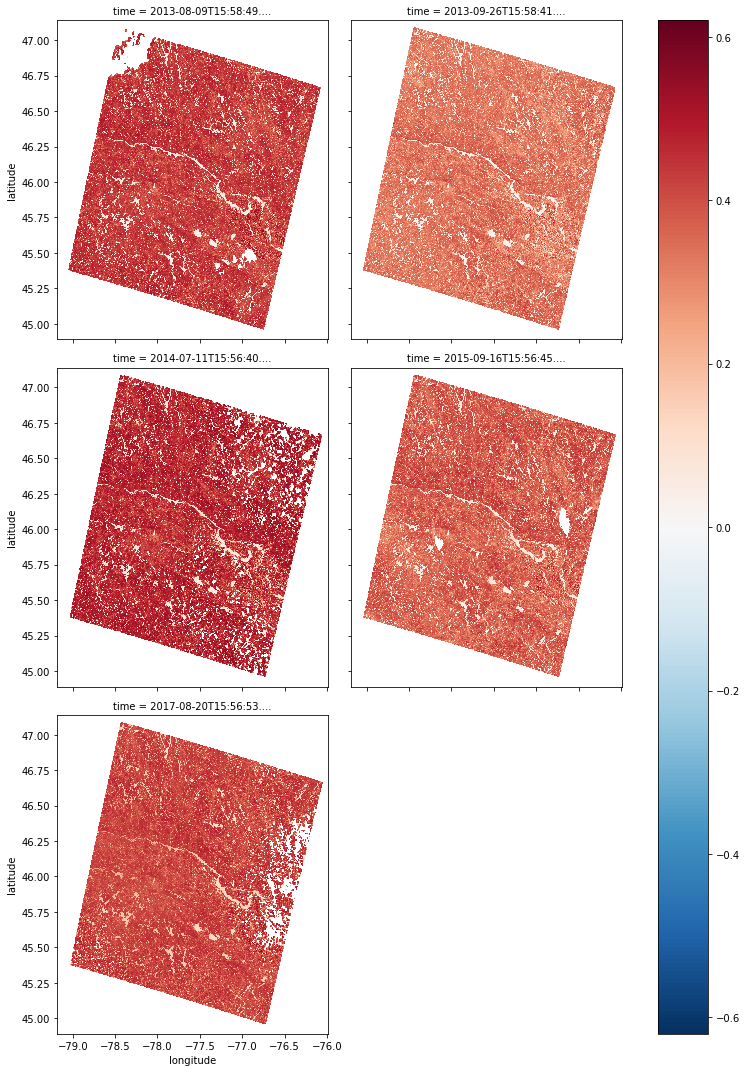

In [36]:
#Calculate and plot the NDBI
NDBI = ((nir - swir2) / (nir + swir2)).where(cloud_free)
NDBI.plot(col='time'
          , col_wrap = 2
          , size = 5)